# Analysis of Top Charting Spotify Songs 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
#/kaggle/input/spotify-top-200-charts-20202021/spotify_dataset.csv

/kaggle/input/spotify-top-200-charts-20202021/spotify_dataset.csv


# Overview of Data

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/kaggle/input/spotify-top-200-charts-20202021/spotify_dataset.csv")
df.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [4]:
df.describe()

,Index,Highest Charting Position,Number of Times Charted
count,1556.000000,1556.000000,1556.000000
mean,778.500000,87.744216,10.668380
std,449.322824,58.147225,16.360546
min,1.000000,1.000000,1.000000
25%,389.750000,37.000000,1.000000
50%,778.500000,80.000000,4.000000
75%,1167.250000,137.000000,12.000000
max,1556.000000,200.000000,142.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

## Preprocessing Data

In [6]:
df[['Week of Highest Charting_start','Week of Highest Charting_end']] = df['Week of Highest Charting'].str.split('--', expand=True)

In [7]:
df['Week of Highest Charting_start'] = pd.to_datetime(df['Week of Highest Charting_start'], yearfirst=True)
df['Week of Highest Charting_end'] = pd.to_datetime(df['Week of Highest Charting_end'], yearfirst=True)
df['Streams'] = df['Streams'].replace(',','', regex=True)
df['Streams'] = df['Streams'].astype('int64')
df[['Artist','Chord']] = df[['Artist','Chord']].astype('category')
# Converting object columns to relevant float/int
object_cols = ['Danceability','Energy','Loudness','Speechiness','Acousticness','Liveness','Tempo','Valence','Artist Followers','Popularity','Duration (ms)']
for each_col in object_cols:
    df[each_col] = pd.to_numeric(df[each_col], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Index                           1556 non-null   int64         
 1   Highest Charting Position       1556 non-null   int64         
 2   Number of Times Charted         1556 non-null   int64         
 3   Week of Highest Charting        1556 non-null   object        
 4   Song Name                       1556 non-null   object        
 5   Streams                         1556 non-null   int64         
 6   Artist                          1556 non-null   category      
 7   Artist Followers                1545 non-null   float64       
 8   Song ID                         1556 non-null   object        
 9   Genre                           1556 non-null   object        
 10  Release Date                    1556 non-null   object        
 11  Week

In [8]:
#Taking the Log base 10 of Streams and Artist Followers
import numpy as np
df['logStreams'] = np.log10(df['Streams'])
df['logFollowers'] = np.log10(df['Artist Followers'])
#Taking negative log of Loudness to switch to more intuitive values
df['logloud'] = np.log10(-df['Loudness'])

#Replacing Duration Miliseconds with seconds so they are on a more standard range
df['Duration(s)'] = df['Duration (ms)']/1000


/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [9]:
#Remove nulls as they all are important numerical variables like popularity and weeks charted
df = df.dropna()
df.isnull().sum() 

Index                             0
Highest Charting Position         0
Number of Times Charted           0
Week of Highest Charting          0
Song Name                         0
Streams                           0
Artist                            0
Artist Followers                  0
Song ID                           0
Genre                             0
Release Date                      0
Weeks Charted                     0
Popularity                        0
Danceability                      0
Energy                            0
Loudness                          0
Speechiness                       0
Acousticness                      0
Liveness                          0
Tempo                             0
Duration (ms)                     0
Valence                           0
Chord                             0
Week of Highest Charting_start    0
Week of Highest Charting_end      0
logStreams                        0
logFollowers                      0
logloud                     

### Exploratory Data Analysis

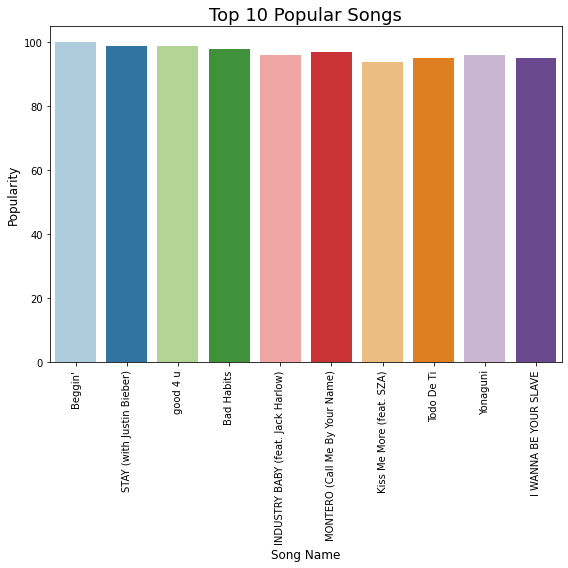

In [10]:
df.sort_values(by=['Popularity'])
df10 = df.head(10)
plt.figure(figsize=(8,8))
sns.barplot(x=df10['Song Name'],
            y=df10['Popularity'], 
            palette="Paired")
plt.xlabel("Song Name", size = 12)
plt.ylabel("Popularity", size = 12)
plt.title("Top 10 Popular Songs", size = 18)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [11]:
import plotly.express as px
fig = px.bar(df10, x='Song Name', y='Popularity')
fig.show()

In [12]:
df.sort_values(by=['Streams'])
df20 = df.head(20)
px.bar(df20,y='Streams',color='Song Name')

In [13]:
px.bar(df20,y='Streams',color='Genre')

In [14]:
Count_artists = len(df['Artist'].value_counts().to_list())
print("Number Of Unique Artists: ",Count_artists)

Number Of Unique Artists:  716


In [15]:
px.bar(df20,y='Streams',color='Artist')

In [16]:
to_drop = ['Index', 'Song Name', 'Artist', 'Song ID', 'Genre', 'Weeks Charted']
df1 = df.drop(to_drop,axis=1)
df1.head()

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Streams,Artist Followers,Release Date,Popularity,Danceability,Energy,Loudness,...,Tempo,Duration (ms),Valence,Chord,Week of Highest Charting_start,Week of Highest Charting_end,logStreams,logFollowers,logloud,Duration(s)
0,1,8,2021-07-23--2021-07-30,48633449,3377762.0,2017-12-08,100.0,0.714,0.800,-4.808,...,134.002,211560.0,0.589,B,2021-07-23,2021-07-30,7.686935,6.528629,0.681964,211.560
1,2,3,2021-07-23--2021-07-30,47248719,2230022.0,2021-07-09,99.0,0.591,0.764,-5.484,...,169.928,141806.0,0.478,C#/Db,2021-07-23,2021-07-30,7.674390,6.348309,0.739097,141.806
2,1,11,2021-06-25--2021-07-02,40162559,6266514.0,2021-05-21,99.0,0.563,0.664,-5.044,...,166.928,178147.0,0.688,A,2021-06-25,2021-07-02,7.603821,6.797026,0.702775,178.147
3,3,5,2021-07-02--2021-07-09,37799456,83293380.0,2021-06-25,98.0,0.808,0.897,-3.712,...,126.026,231041.0,0.591,B,2021-07-02,2021-07-09,7.577486,7.920610,0.569608,231.041
4,5,1,2021-07-23--2021-07-30,33948454,5473565.0,2021-07-23,96.0,0.736,0.704,-7.409,...,149.995,212000.0,0.894,D#/Eb,2021-07-23,2021-07-30,7.530820,6.738270,0.869760,212.000


In [17]:
org = [i for i in df1.columns]
cols = df1[org].select_dtypes(include=['float64']).columns
cols = [i for i in cols if i not in ['Chord']]
cols

['Artist Followers',
 'Popularity',
 'Danceability',
 'Energy',
 'Loudness',
 'Speechiness',
 'Acousticness',
 'Liveness',
 'Tempo',
 'Duration (ms)',
 'Valence',
 'logStreams',
 'logFollowers',
 'logloud',
 'Duration(s)']

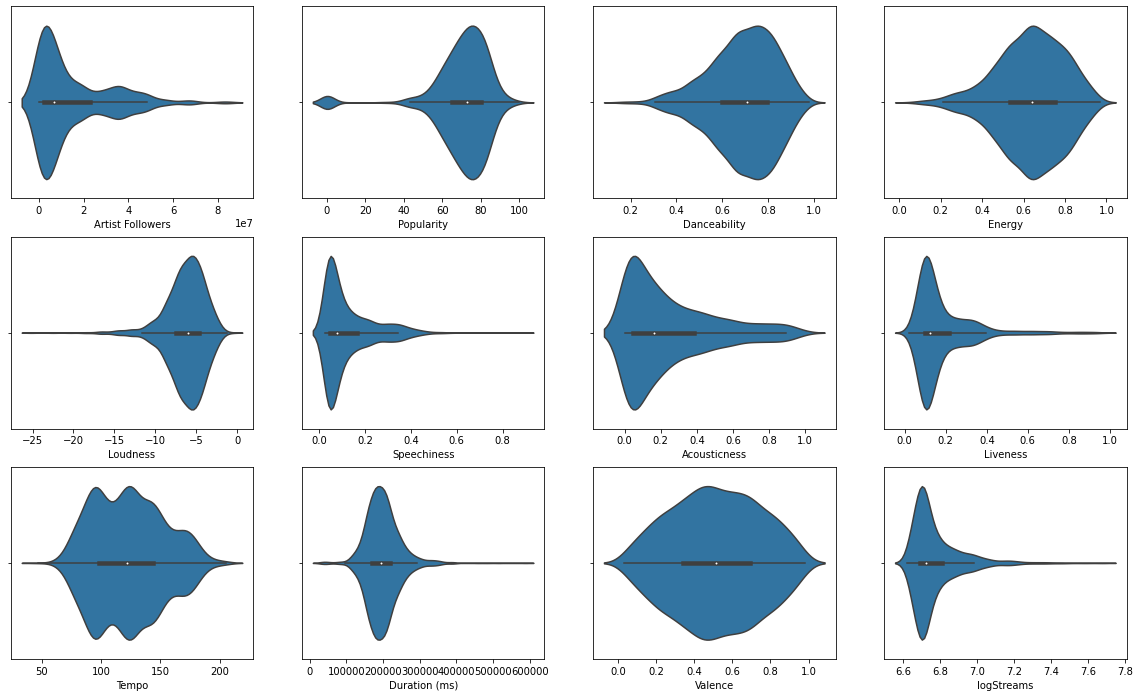

In [18]:
plt.figure(figsize=(20,12))
for i in enumerate(cols):
    num = i[0]+1
    if num <= 12:
        plt.subplot(3,4,num)
        sns.violinplot(data=df1, x=i[1])
    else:
        break
plt.show()

In [19]:
to_drop = ['logStreams', 'Duration (ms)', 'Tempo', 'Loudness', 'Artist Followers', 'Release Date', 'Streams', 'Chord', 'Week of Highest Charting_start', 'Week of Highest Charting_end', 'logFollowers', 'Week of Highest Charting', 'Number of Times Charted', 'Highest Charting Position', 'Duration(s)']
dfdist = df1.drop(to_drop,axis=1)
dfdist.head(20)

,Popularity,Danceability,Energy,Speechiness,Acousticness,Liveness,Valence,logloud
0,100.0,0.714,0.800,0.0504,0.12700,0.3590,0.5890,0.681964
1,99.0,0.591,0.764,0.0483,0.03830,0.1030,0.4780,0.739097
2,99.0,0.563,0.664,0.1540,0.33500,0.0849,0.6880,0.702775
3,98.0,0.808,0.897,0.0348,0.04690,0.3640,0.5910,0.569608
4,96.0,0.736,0.704,0.0615,0.02030,0.0501,0.8940,0.869760
5,97.0,0.610,0.508,0.1520,0.29700,0.3840,0.7580,0.824906
6,94.0,0.762,0.701,0.0286,0.23500,0.1230,0.7420,0.549126
7,95.0,0.780,0.718,0.0506,0.31000,0.0932,0.3420,0.556905
8,96.0,0.644,0.648,0.1180,0.27600,0.1350,0.4400,0.662852
9,95.0,0.750,0.608,0.0387,0.00165,0.1780,0.9580,0.602928


In [20]:
dfdist.sort_values(by=['Popularity'])
dfdist20 = dfdist.head(20)

In [21]:
to_drop = ['Popularity']
dfdist20 = dfdist20.drop(to_drop,axis=1)
dfdist20.head(20)

,Danceability,Energy,Speechiness,Acousticness,Liveness,Valence,logloud
0,0.714,0.800,0.0504,0.12700,0.3590,0.5890,0.681964
1,0.591,0.764,0.0483,0.03830,0.1030,0.4780,0.739097
2,0.563,0.664,0.1540,0.33500,0.0849,0.6880,0.702775
3,0.808,0.897,0.0348,0.04690,0.3640,0.5910,0.569608
4,0.736,0.704,0.0615,0.02030,0.0501,0.8940,0.869760
5,0.610,0.508,0.1520,0.29700,0.3840,0.7580,0.824906
6,0.762,0.701,0.0286,0.23500,0.1230,0.7420,0.549126
7,0.780,0.718,0.0506,0.31000,0.0932,0.3420,0.556905
8,0.644,0.648,0.1180,0.27600,0.1350,0.4400,0.662852
9,0.750,0.608,0.0387,0.00165,0.1780,0.9580,0.602928


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/opt/conda/lib/python3

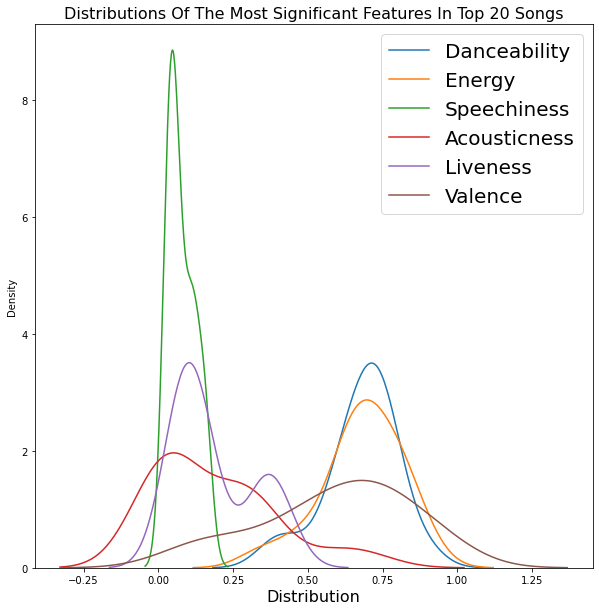

In [22]:
plt.figure(figsize=(10,10))
ax = sns.distplot(dfdist20['Danceability'],hist=False,label='Danceability')
ax = sns.distplot(dfdist20['Energy'],hist=False,label='Energy')
ax = sns.distplot(dfdist20['Speechiness'],hist=False,label='Speechiness')
ax = sns.distplot(dfdist20['Acousticness'],hist=False,label='Acousticness')                  
ax = sns.distplot(dfdist20['Liveness'],hist=False,label='Liveness')                  
ax = sns.distplot(dfdist20['Valence'],hist=False,label='Valence')                  
ax.set_xlabel('Distribution',fontsize=16)
ax.set_title('Distributions Of The Most Significant Features In Top 20 Songs',fontsize=16)
plt.legend(prop={'size':'20'})
plt.show()                

In [23]:
#import plotly.figure_factory as ff
#group_labels = ['Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Liveness', 'Valence']
#colors = ['#333F44', '#37AA9C', '#94F3E4','#88F3E3','#77E5E4','#66E5E4']

# Create distplot with curve_type set to 'normal'
#fig = ff.create_distplot(dfdist20, group_labels, show_hist=False, colors=colors)

# Add title
#fig.update_layout(title_text='Popular Song Distribution Plot')
#fig.show()

In [24]:

fig = px.bar(df10, x='Artist', y='Popularity')
fig.show()

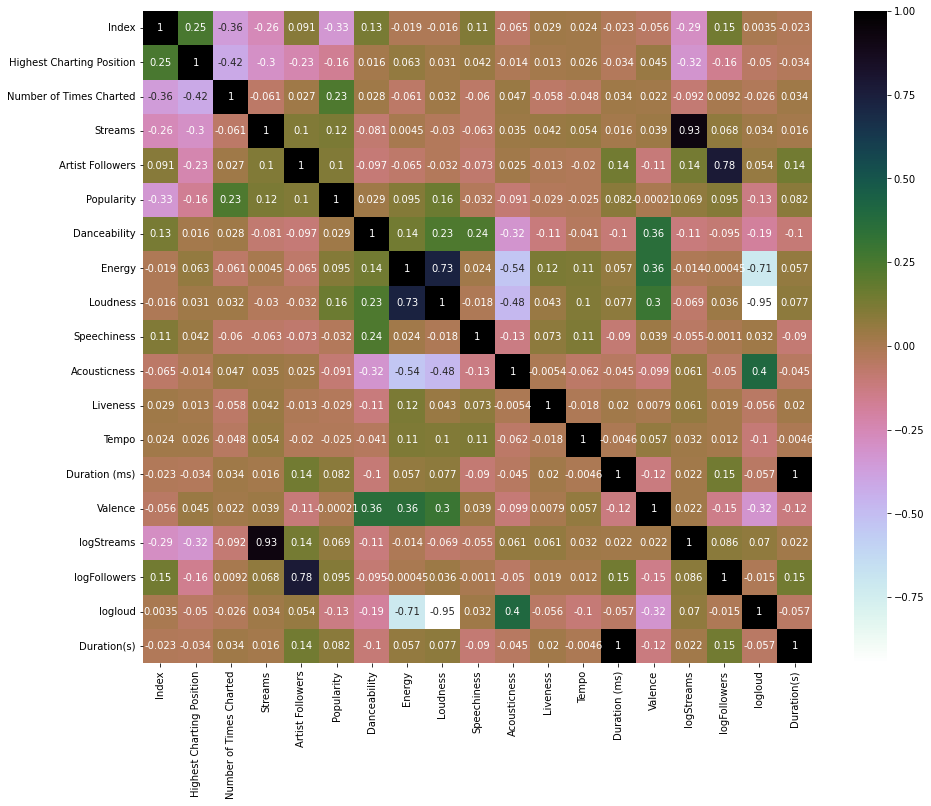

In [25]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r')
plt.show()

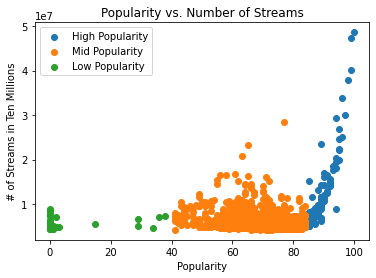

<Figure size 2000x2000 with 0 Axes>

High Popularity Correlation: 
             Popularity   Streams
Popularity    1.000000  0.900196
Streams       0.900196  1.000000
Mid Popularity Correlation: 
             Popularity   Streams
Popularity    1.000000 -0.306747
Streams      -0.306747  1.000000
Low Popularity Correlation: 
             Popularity  Streams
Popularity     1.00000  0.19786
Streams        0.19786  1.00000


In [26]:
#Exploration of Popularity vs. the Number of Streams
high_pop = df[df.Popularity >= 85]
mid_pop = df[(df.Popularity < 85) & (df.Popularity >= 40)]
low_pop = df[df.Popularity < 40]

plt.scatter(high_pop.Popularity, high_pop['Streams'], label = "High Popularity")
plt.scatter(mid_pop.Popularity, mid_pop['Streams'], label = "Mid Popularity")
plt.scatter(low_pop.Popularity, low_pop['Streams'], label = "Low Popularity")

plt.title("Popularity vs. Number of Streams")
plt.xlabel("Popularity")
plt.ylabel("# of Streams in Ten Millions")
plt.legend()
plt.figure(figsize = (10,10), dpi = 200)

plt.show()

print('\033[1m' + "High Popularity Correlation:" + '\033[0m', '\n', high_pop[["Popularity", "Streams"]].corr())
print('\033[1m' + "Mid Popularity Correlation:" + '\033[0m', '\n', mid_pop[["Popularity", "Streams"]].corr())
print('\033[1m' + "Low Popularity Correlation:" + '\033[0m', '\n', low_pop[["Popularity", "Streams"]].corr())

## Data Modelling

In [27]:
#Library for modelling
from sklearn.preprocessing import LabelEncoder #Encodes Categorical Data into Numerical
from sklearn.model_selection import train_test_split #For spliting data into training and testing sets
from sklearn.linear_model import LinearRegression #Linear Regression model
from sklearn.ensemble import RandomForestRegressor#Random Forest Regression Model
from sklearn.metrics import mean_absolute_error 
def RMSE(y,yhat):
    return np.sqrt(mean_squared_error(y,yhat))

In [28]:
#Dropping the data columns 
clean_df = df.drop(["Artist", "Song Name", "Release Date", "Song ID", "Week of Highest Charting_start", "Week of Highest Charting_end", "Weeks Charted", "Chord", "Index", "Week of Highest Charting"], axis=1)
clean_df.head()

,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,logStreams,logFollowers,logloud,Duration(s)
0,1,8,48633449,3377762.0,"['indie rock italiano', 'italian pop']",100.0,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560.0,0.589,7.686935,6.528629,0.681964,211.560
1,2,3,47248719,2230022.0,['australian hip hop'],99.0,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806.0,0.478,7.674390,6.348309,0.739097,141.806
2,1,11,40162559,6266514.0,['pop'],99.0,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147.0,0.688,7.603821,6.797026,0.702775,178.147
3,3,5,37799456,83293380.0,"['pop', 'uk pop']",98.0,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041.0,0.591,7.577486,7.920610,0.569608,231.041
4,5,1,33948454,5473565.0,"['lgbtq+ hip hop', 'pop rap']",96.0,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000.0,0.894,7.530820,6.738270,0.869760,212.000


In [29]:
#Encoding Genre
genre_encoder = LabelEncoder()
clean_df['Genre'] = genre_encoder.fit_transform(clean_df['Genre'])
clean_df.head()

,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,logStreams,logFollowers,logloud,Duration(s)
0,1,8,48633449,3377762.0,276,100.0,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560.0,0.589,7.686935,6.528629,0.681964,211.560
1,2,3,47248719,2230022.0,63,99.0,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806.0,0.478,7.674390,6.348309,0.739097,141.806
2,1,11,40162559,6266514.0,364,99.0,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147.0,0.688,7.603821,6.797026,0.702775,178.147
3,3,5,37799456,83293380.0,363,98.0,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041.0,0.591,7.577486,7.920610,0.569608,231.041
4,5,1,33948454,5473565.0,312,96.0,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000.0,0.894,7.530820,6.738270,0.869760,212.000


In [30]:
train, test = train_test_split(clean_df, test_size=0.2, random_state=25)

print(f"No. of training examples: {train.shape[0]}")
print(f"No. of testing examples: {test.shape[0]}")

No. of training examples: 1235
No. of testing examples: 309


In [31]:
#Dropping Stream Column From Test data
test_stream=test['Streams']
test=test.drop('Streams', axis=1)
test.head()

,Highest Charting Position,Number of Times Charted,Artist Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,logStreams,logFollowers,logloud,Duration(s)
1501,113,1,46814751.0,187,60.0,0.635,0.543,-5.941,0.0670,0.0454,0.2720,98.743,303000.0,0.036,6.852200,7.670383,0.773860,303.000
1239,163,5,3828418.0,99,73.0,0.464,0.547,-8.137,0.3390,0.0511,0.1550,67.003,221492.0,0.423,6.642879,6.583019,0.910464,221.492
1015,169,1,942380.0,246,60.0,0.874,0.542,-7.064,0.3440,0.0621,0.1810,142.016,196933.0,0.481,6.681519,5.974226,0.849051,196.933
667,22,2,42227614.0,360,66.0,0.575,0.434,-8.193,0.0312,0.7350,0.1050,145.916,229840.0,0.348,6.909316,7.625597,0.913443,229.840
1432,66,7,82522.0,114,70.0,0.866,0.438,-8.943,0.0719,0.1770,0.0743,129.039,223258.0,0.695,6.816561,4.916570,0.951483,223.258


In [32]:
#Setting training data into x_train and y_train
x_train=train.drop('Streams',axis=1)
y_train=train['Streams']

#Shapes of x_train,y_train and test data
x_train.shape, y_train.shape, test.shape

((1235, 18), (1235,), (309, 18))

#### Modelling Code Blocks

In [33]:
#Linear Regression Modelling and Training
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)
print(linear_model.score(x_train,y_train))

#testing the model and Displaying the output
linear_predict=linear_model.predict(test)
linear_result=pd.DataFrame({'Id':test.index,'Predicted Streams':linear_predict,'Actual Stream':test_stream})
print(linear_result)

0.8612067469813115
        Id  Predicted Streams  Actual Stream
1501  1501       7.704571e+06        7115414
1239  1239       2.946518e+06        4394195
1015  1015       4.252831e+06        4803071
667    667       9.306595e+06        8115520
1432  1432       7.388868e+06        6554824
...    ...                ...            ...
338    338       9.254150e+06        7880155
736    736       9.787957e+06        8413330
867    867       6.873134e+06        6292620
1094  1094       3.220078e+06        4473413
238    238       6.314533e+06        5912293

[309 rows x 3 columns]


In [34]:
#Random Forest Regression
random_model=RandomForestRegressor(n_estimators=50)
random_model.fit(x_train,y_train)
print(random_model.score(x_train,y_train))

#Making predictions on test set 
random_predict=random_model.predict(test)

random_result=pd.DataFrame({'Id':test.index,'Predicted Streams':random_predict,'Actual Stream':test_stream})
print(random_result)

0.9980585248061161
        Id  Predicted Streams  Actual Stream
1501  1501         7134360.04        7115414
1239  1239         4393085.68        4394195
1015  1015         4800885.76        4803071
667    667         8128724.42        8115520
1432  1432         6553545.36        6554824
...    ...                ...            ...
338    338         7855636.72        7880155
736    736         8378812.62        8413330
867    867         6296479.70        6292620
1094  1094         4474570.02        4473413
238    238         5916500.60        5912293

[309 rows x 3 columns]


In [35]:
from sklearn.linear_model import Lasso #Lasso regression model
from sklearn.linear_model import Ridge #Ridge Regression Model

In [36]:
#Building the model in Ridge Regression Model
ridge_model=Ridge(alpha=1.0)
ridge_model.fit(x_train,y_train)
print(ridge_model.score(x_train,y_train))

#Testing the model
ridge_predict=ridge_model.predict(test)

#Creating dataframe to store ID with prediction
ridge_result=pd.DataFrame({'Id':test.index,'Predicted Streams':ridge_predict,'Actual Stream':test_stream})
print(ridge_result)

0.859551479314046
        Id  Predicted Streams  Actual Stream
1501  1501       7.589382e+06        7115414
1239  1239       3.038467e+06        4394195
1015  1015       4.248006e+06        4803071
667    667       9.274501e+06        8115520
1432  1432       7.369808e+06        6554824
...    ...                ...            ...
338    338       9.166292e+06        7880155
736    736       9.726559e+06        8413330
867    867       6.849656e+06        6292620
1094  1094       3.323132e+06        4473413
238    238       6.367504e+06        5912293

[309 rows x 3 columns]


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning:

Ill-conditioned matrix (rcond=2.8502e-18): result may not be accurate.



In [37]:
#Building the model in Lasso Regression Model 
lasso_model=Lasso(alpha=1.0)
lasso_model.fit(x_train,y_train)
print(lasso_model.score(x_train,y_train))

#Testing the model
lasso_predict=lasso_model.predict(test)

#Creating dataframe to store ID with prediction
lasso_result=pd.DataFrame({'Id':test.index,'Predicted Streams':lasso_predict,'Actual Stream':test_stream})
print(lasso_result)

0.8612067469206501
        Id  Predicted Streams  Actual Stream
1501  1501       7.704562e+06        7115414
1239  1239       2.946536e+06        4394195
1015  1015       4.252826e+06        4803071
667    667       9.306578e+06        8115520
1432  1432       7.388842e+06        6554824
...    ...                ...            ...
338    338       9.254137e+06        7880155
736    736       9.787933e+06        8413330
867    867       6.873163e+06        6292620
1094  1094       3.220110e+06        4473413
238    238       6.314522e+06        5912293

[309 rows x 3 columns]


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1070605405403455.5, tolerance: 1545778530671.71



#### Evaluation of Model Results

In [38]:
print('Lasso Model Acuracy: ', lasso_model.score(x_train,y_train))
print('Ridge Model Acuracy: ', ridge_model.score(x_train,y_train))
print('Random Forest Model Acuracy: ', random_model.score(x_train,y_train))
print('Linear Regression Model Acuracy: ', linear_model.score(x_train,y_train))

Lasso Model Acuracy:  0.8612067469206501
Ridge Model Acuracy:  0.859551479314046
Random Forest Model Acuracy:  0.9980585248061161
Linear Regression Model Acuracy:  0.8612067469813115


In [39]:
import plotly.graph_objs as go
fig = go.Figure(data=[go.Table(header=dict(values=['<b>Model<b>', '<b>Accuracy Score<b>'],
                                           line_color='darkslategray',
    fill_color='whitesmoke',
    align=['center','center'],
    font=dict(color='black', size=18),
    height=10),
    cells=dict(values=[['<b>Random Forest<b>', '<b>Linear Regression<b>','<b>Lasso<b>','<b>Ridge<b>'],
                                    [np.round(random_model.score(x_train,y_train).mean(),4), 
                                     np.round(linear_model.score(x_train,y_train).mean(),4),
                                     np.round(lasso_model.score(x_train,y_train),4),
                                     np.round(ridge_model.score(x_train,y_train).mean(),4) 
                                    ]]))
                     ])
fig.update_layout(title='Model Results')
fig.show()

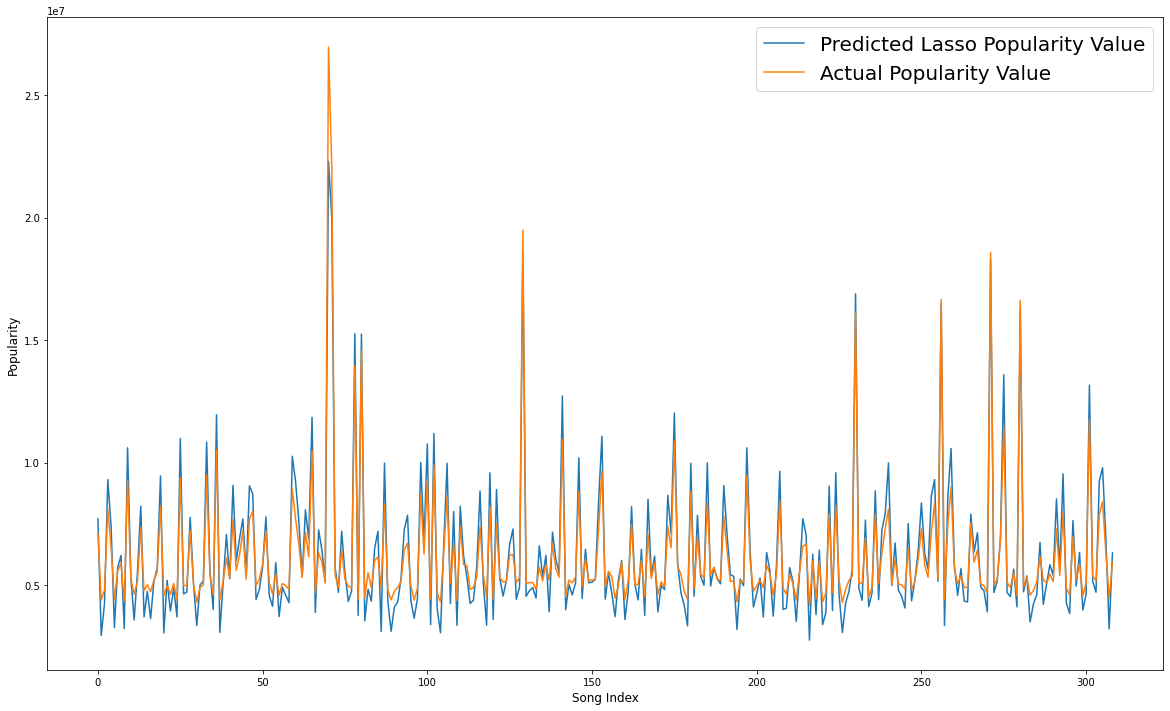

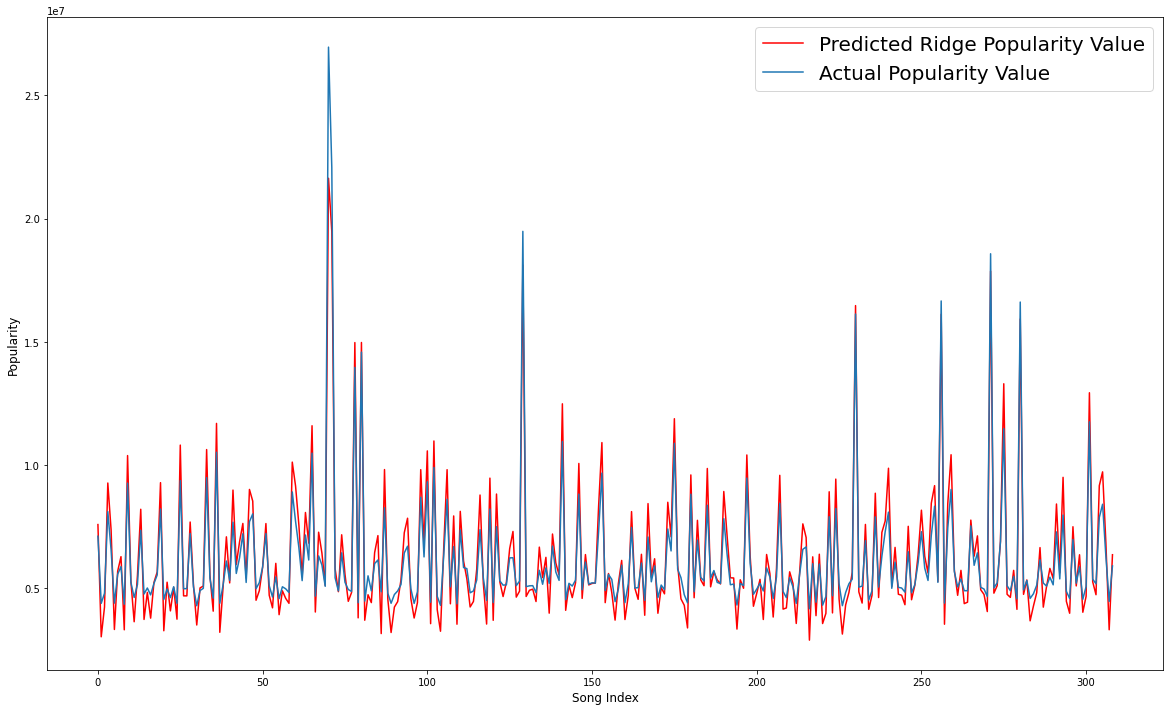

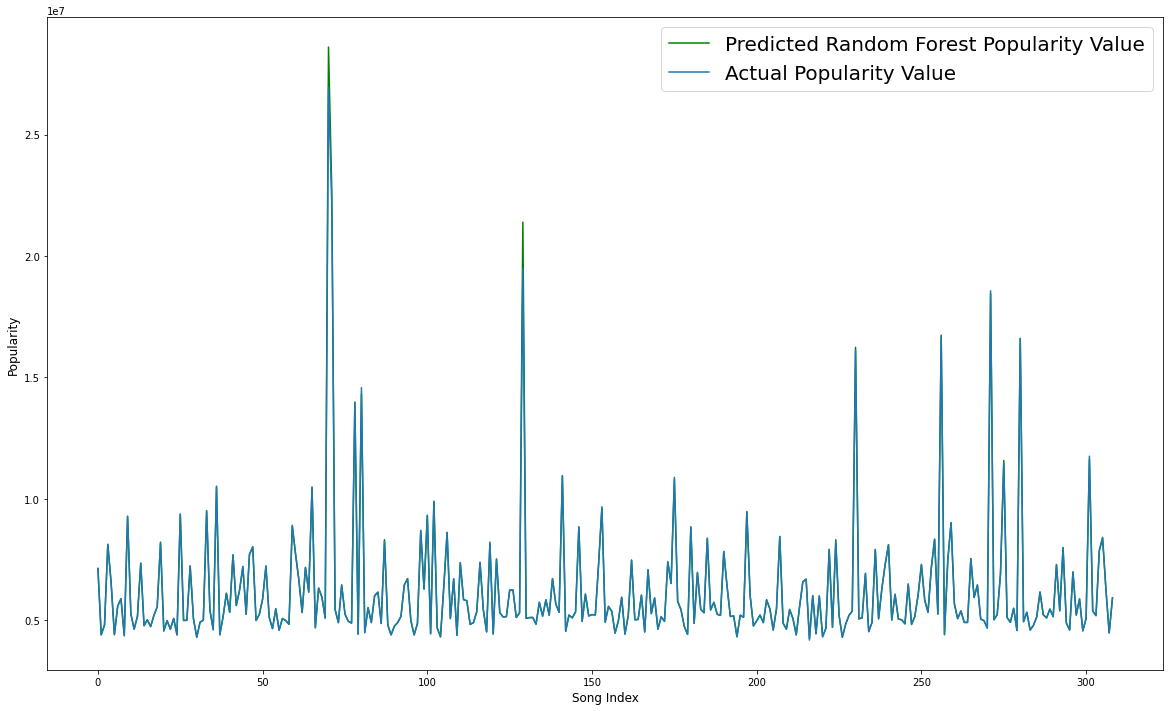

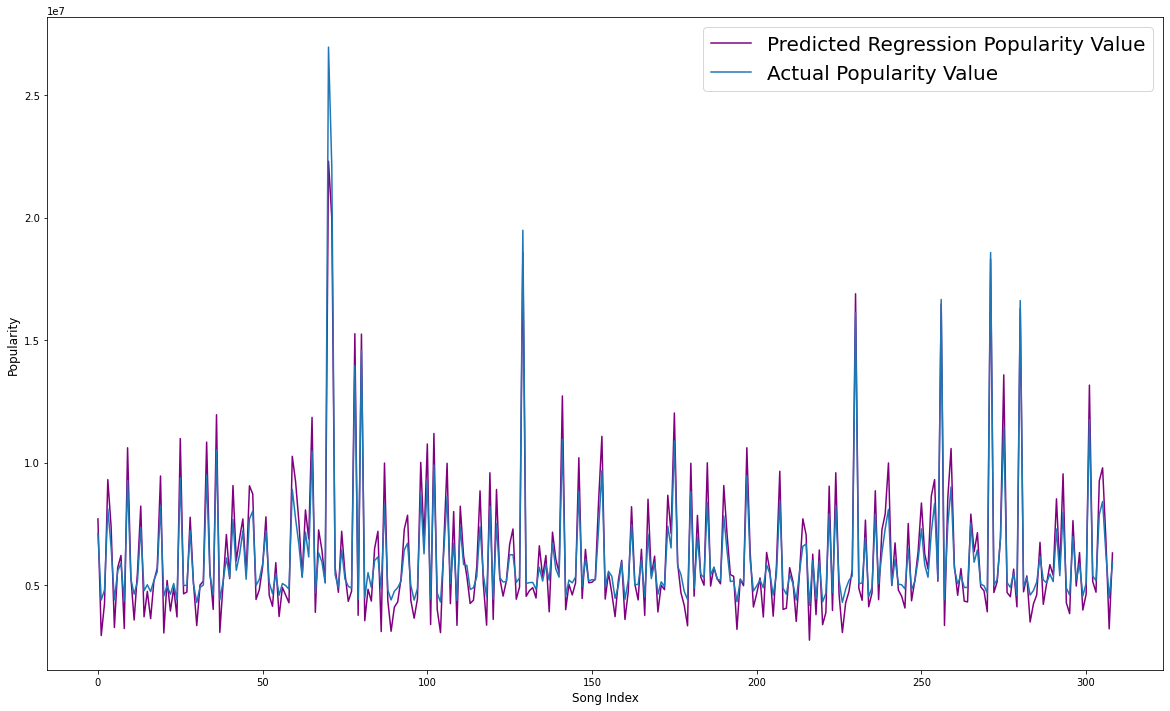

In [40]:
plt.figure(figsize=(20,12))
ax=sns.lineplot(x=np.arange(0,len(lasso_predict)),y=lasso_predict,label = 'Predicted Lasso Popularity Value')
ax = sns.lineplot(x=np.arange(0,len(test_stream)),y=test_stream,label = 'Actual Popularity Value')
ax.set_xlabel('Song Index',fontsize=12)
ax.set_ylabel('Popularity',fontsize=12)
prop3 = dict(boxstyle='round',facecolor='orange',alpha=0.5)
#ax.text(0.05, 0.25, 'RMSE : {:.2f}'.format(rmse), transform=ax.transAxes, fontsize=27,
        #verticalalignment='top', bbox=prop3)
plt.legend(prop={'size':'20'})
plt.show()

plt.figure(figsize=(20,12))
ax=sns.lineplot(x=np.arange(0,len(ridge_predict)),y=ridge_predict,label = 'Predicted Ridge Popularity Value', color='red')
ax = sns.lineplot(x=np.arange(0,len(test_stream)),y=test_stream,label = 'Actual Popularity Value')
ax.set_xlabel('Song Index',fontsize=12)
ax.set_ylabel('Popularity',fontsize=12)
prop3 = dict(boxstyle='round',facecolor='red',alpha=0.5)
#ax.text(0.05, 0.25, 'RMSE : {:.2f}'.format(rmse), transform=ax.transAxes, fontsize=27,
        #verticalalignment='top', bbox=prop3)
plt.legend(prop={'size':'20'})
plt.show()

plt.figure(figsize=(20,12))
ax=sns.lineplot(x=np.arange(0,len(random_predict)),y=random_predict,label = 'Predicted Random Forest Popularity Value',color='green')
ax = sns.lineplot(x=np.arange(0,len(test_stream)),y=test_stream,label = 'Actual Popularity Value')
ax.set_xlabel('Song Index',fontsize=12)
ax.set_ylabel('Popularity',fontsize=12)
prop3 = dict(boxstyle='round',facecolor='green',alpha=0.5)
#ax.text(0.05, 0.25, 'RMSE : {:.2f}'.format(rmse), transform=ax.transAxes, fontsize=27,
        #verticalalignment='top', bbox=prop3)
plt.legend(prop={'size':'20'})
plt.show()

plt.figure(figsize=(20,12))
ax=sns.lineplot(x=np.arange(0,len(linear_predict)),y=linear_predict,label = 'Predicted Regression Popularity Value', color='purple')
ax = sns.lineplot(x=np.arange(0,len(test_stream)),y=test_stream,label = 'Actual Popularity Value')
ax.set_xlabel('Song Index',fontsize=12)
ax.set_ylabel('Popularity',fontsize=12)
prop3 = dict(boxstyle='round',facecolor='purple',alpha=0.5)
#ax.text(0.05, 0.25, 'RMSE : {:.2f}'.format(rmse), transform=ax.transAxes, fontsize=27,
        #verticalalignment='top', bbox=prop3)
plt.legend(prop={'size':'20'})
plt.show()

#### Dummy encoding the unique genres

In [41]:
#Parsing the genres into individual columns
import string
genres = []
spotify = df

for rowlist in spotify.Genre:
    for item in rowlist.split("'"):
        item = item.translate(str.maketrans('', '', string.punctuation))
        if item not in genres:
            genres.append(item)
        if len(item) < 2:
            genres.remove(item)
    
print(genres)
print(len(genres))

['indie rock italiano', 'italian pop', 'australian hip hop', 'pop', 'uk pop', 'lgbtq hip hop', 'pop rap', 'dance pop', 'puerto rican pop', 'trap latino', 'latin', 'reggaeton', 'reggaeton colombiano', 'kpop', 'kpop boy group', 'canadian pop', 'postteen pop', 'canadian contemporary rb', 'gauze pop', 'indietronica', 'shiver pop', 'latin hip hop', 'dfw rap', 'melodic rap', 'rap', 'house', 'pop dance', 'tropical house', 'uk dance', 'electropop', 'colombian pop', 'chicago rap', 'panamanian pop', 'latin pop', 'pop argentino', 'big room', 'brostep', 'dutch edm', 'edm', 'electro house', 'slap house', 'trance', 'cali rap', 'trap argentino', 'argentine hip hop', 'pop venezolano', 'progressive electro house', 'dreamo', 'indie surf', 'surf punk', 'vegas indie', 'pop rock', 'piano rock', 'houston rap', 'trap queen', 'german dance', 'german techno', 'german trance', 'rb', 'modern alternative rock', 'modern rock', 'canadian hip hop', 'toronto rap', 'brooklyn drill', 'nyc rap', 'aussietronica', 'mexica

In [42]:
hip_hop = []
rap = []
pop = []
rock = []

for item in genres:
    if 'pop' in item:
        pop.append(item)
    elif 'rap' in item:
        rap.append(item)
    elif 'hip hop' in item:
        hip_hop.append(item)
    elif 'rock' in item:
        rock.append(item)

pop.sort()    

print(pop)
print(len(pop))
print(rap)
print(len(rap))
print(hip_hop)
print(len(hip_hop))
print(rock)
print(len(rock))

['acoustic pop', 'alternative pop rock', 'art pop', 'australian pop', 'bedroom pop', 'brill building pop', 'britpop', 'canadian pop', 'classic uk pop', 'colombian pop', 'cumbia pop', 'dance pop', 'dominican pop', 'dutch pop', 'electropop', 'etherpop', 'europop', 'folkpop', 'funk pop', 'gauze pop', 'german pop', 'hip pop', 'icelandic pop', 'indie cafe pop', 'indie pop', 'indie pop rap', 'indie poptimism', 'indonesian pop', 'italian adult pop', 'italian indie pop', 'italian pop', 'italian pop rock', 'jazz pop', 'kpop', 'kpop boy group', 'kpop girl group', 'latin pop', 'latin viral pop', 'melanesian pop', 'metropopolis', 'modern indie pop', 'new wave pop', 'norwegian pop', 'nyc pop', 'nz pop', 'pacific islands pop', 'panamanian pop', 'png pop', 'pop', 'pop argentino', 'pop dance', 'pop edm', 'pop house', 'pop nacional', 'pop rap', 'pop rb', 'pop reggaeton', 'pop rock', 'pop soul', 'pop urbaine', 'pop venezolano', 'postteen pop', 'puerto rican pop', 'scandipop', 'sertanejo pop', 'shiver po

In [43]:
##Replace pop, rap, and hip hop variants with a generic genre to reduce dimensionality
genre_trim = genres

def genre_trimmer():
    for i in range(len(genre_trim)):
        if genre_trim[i] in pop:
            genre_trim[i] = 'pop'
        elif genre_trim[i] in rap:
            genre_trim[i] = 'rap'
        elif genre_trim[i] in hip_hop:
            genre_trim[i] = 'hip hop'

genre_trimmer()
genres_unique = np.unique(np.array(genre_trim))
print(len(genres_unique))
print(genres_unique)

174
['a cappella' 'adult standards' 'afrofuturism' 'afroswing' 'album rock'
 'alt z' 'alternative metal' 'alternative rb' 'american folk revival'
 'art rock' 'aussietronica' 'australian dance' 'australian psych'
 'australian rock' 'banda' 'basshall' 'beatlesque' 'bedroom soul'
 'big room' 'boy band' 'brega funk' 'british soul' 'brooklyn drill'
 'brostep' 'bubblegrunge' 'canadian contemporary rb' 'canadian latin'
 'celtic' 'celtic punk' 'celtic rock' 'champeta' 'chicago drill'
 'chicago indie' 'chicago soul' 'chill rb' 'classic rock' 'classic soul'
 'comic' 'contemporary country' 'corrido' 'country' 'country road'
 'country rock' 'cubaton' 'dance rock' 'deep euro house' 'deep house'
 'dembow' 'disco' 'dream smp' 'dreamo' 'drill' 'dutch edm'
 'easy listening' 'eau claire indie' 'edm' 'electro house'
 'electro latino' 'escape room' 'eurodance' 'eurovision' 'folk punk'
 'folk rock' 'folktronica' 'forro' 'francoton' 'funk' 'funk 150 bpm'
 'funk bh' 'funk carioca' 'funk ostentacao' 'funk pau

In [44]:
genre = pd.DataFrame(genres_unique)
genre = genre.rename(columns={0: 'Genre'})

genre.head()

,Genre
0,a cappella
1,adult standards
2,afrofuturism
3,afroswing
4,album rock
